In [ ]:
!git clone https://github.com/nicolasmetallo/eameo-faceswap-generator

Cloning into 'eameo-faceswap-generator'...
remote: Enumerating objects: 266, done.
remote: Counting objects: 100% (16/16), done.
remote: Total 266 (delta 15), reused 15 (delta 15), pack-reused 250
Receiving objects: 100% (266/266), 168.59 MiB | 33.70 MiB/s, done.
Resolving deltas: 100% (88/88), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls

drive/  eameo-faceswap-generator/  sample_data/


In [ ]:
cd eameo-faceswap-generator

/content/eameo-faceswap-generator


In [ ]:
ls

faceBlendCommon.py            __init__.py
faceswap.py                   README.md
face-swap-step-by-step.ipynb  requirements.txt
haarcascade_eye.xml           shape_predictor_68_face_landmarks.dat
image1.jpg                    utils.py
image2.jpg


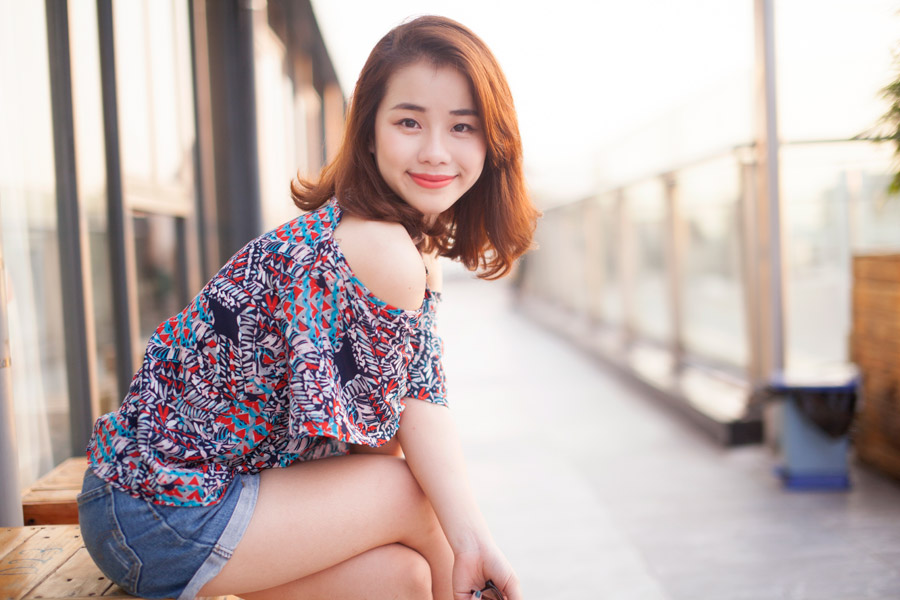

In [ ]:
import dlib
import cv2
from imutils import face_utils
from google.colab.patches import cv2_imshow
import numpy as np

face_detector = dlib.get_frontal_face_detector()

predictor_path = "shape_predictor_68_face_landmarks.dat"
face_predictor = dlib.shape_predictor(predictor_path)

#著作権フリー画像
sample_path='/content/drive/MyDrive/sample.jpg'
img=cv2.imread(sample_path)
cv2_imshow(img)

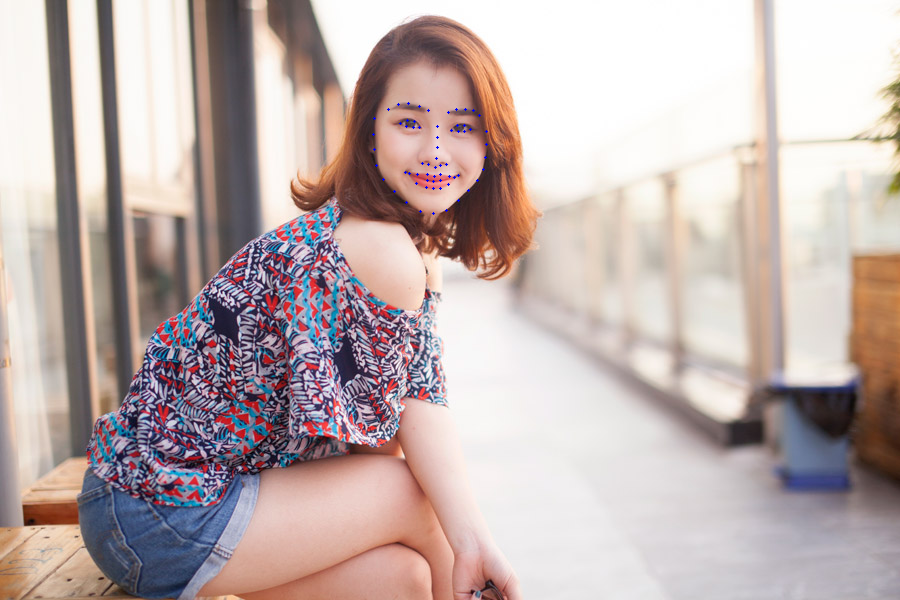

In [ ]:
faces = face_detector(img,1)
for face in faces:
  landmark=face_predictor(img,face)
  landmark=face_utils.shape_to_np(landmark)
  for (i,(x,y)) in enumerate(landmark):
    exp=cv2.circle(img,(x,y),1,(255,0,0),-1)
cv2_imshow(exp)

配列が0-67まで割振られているから番号ごとに特徴量を取得できる

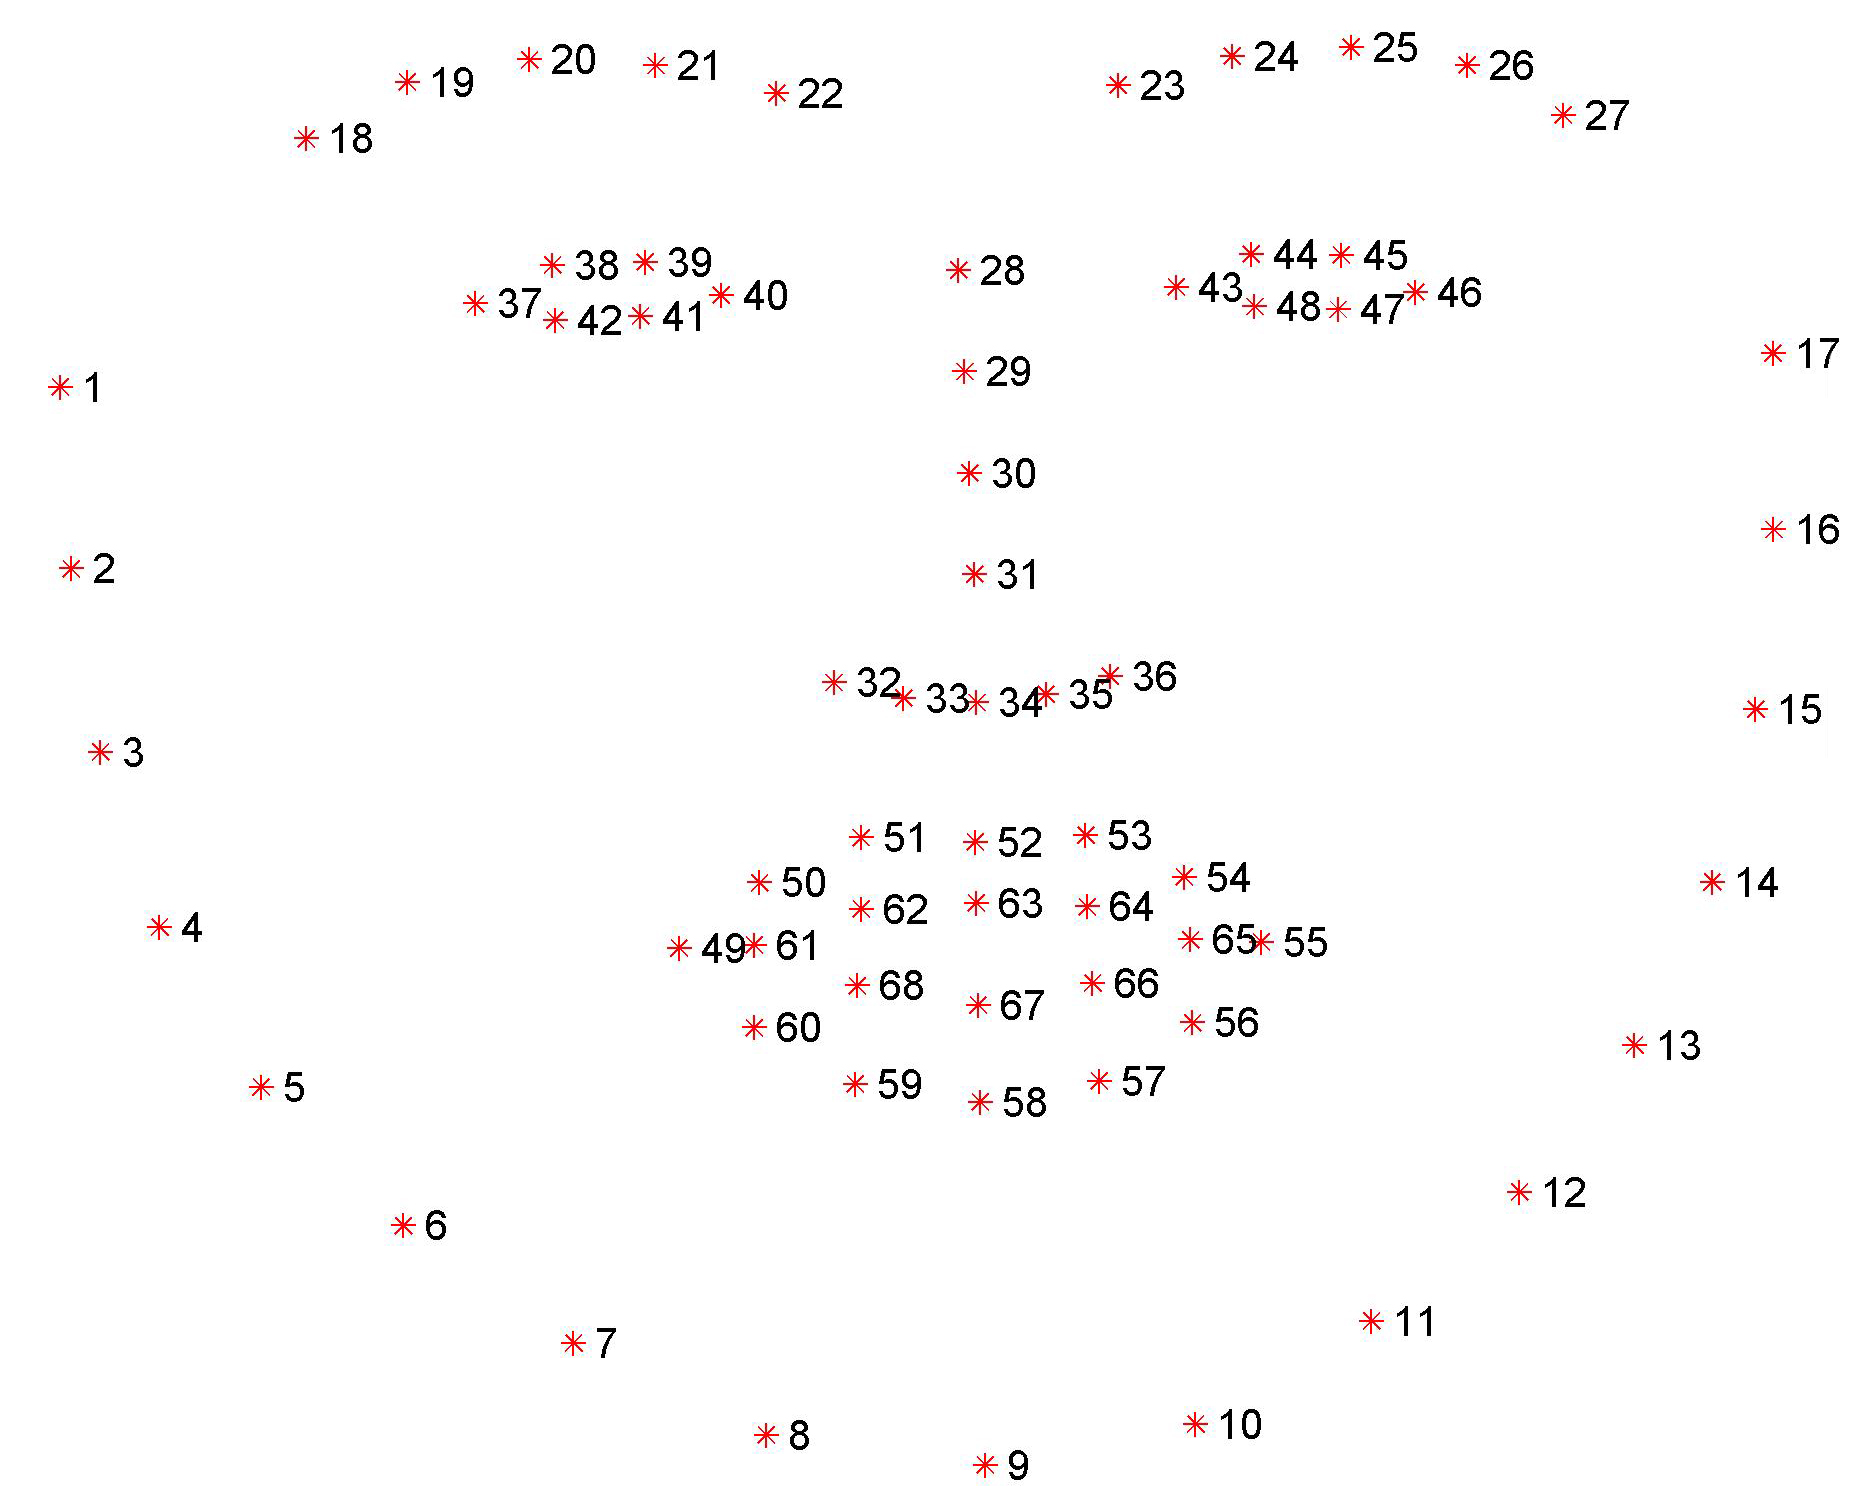

In [ ]:
#目と口を特徴量として扱う
def create_imgs(path):
  face_detector = dlib.get_frontal_face_detector() 
  predictor_path = 'shape_predictor_68_face_landmarks.dat'
  face_predictor = dlib.shape_predictor(predictor_path)
  
  img=cv2.imread(path)
  faces=face_detector(img,1)
  for face in faces:
    landmark=face_predictor(img,face)
    landmark=face_utils.shape_to_np(landmark)
    landmark_38=landmark[37][1]
    landmark_39=landmark[38][1]
  
    if landmark_38>=landmark_39:
      left_top_eye=landmark_38
    else:
      left_top_eye=landmark_39

    landmark_41=landmark[40][1]
    landmark_42=landmark[41][1]

    if landmark_41<=landmark_42:
      left_bottom_eye=landmark_41
    else:
      left_bottom_eye=landmark_42

    landmark_37=landmark[36][0]
    landmark_40=landmark[39][0]
    left_eye=img[left_top_eye-10:left_bottom_eye+10,landmark_37-10:landmark_40+10]

    landmark44=landmark[43][1]
    landmark45=landmark[44][1]
    if landmark44>landmark45:
      right_top_eye=landmark44
    else:
      right_top_eye=landmark45
    landmark47=landmark[46][1]
    landmark48=landmark[47][1]
    if landmark47<=landmark48:
      right_bottom_eye=landmark47
    else:
      right_bottom_eye=landmark48
  #x1
    landmark43=landmark[42][0]
  #x2
    landmark46=landmark[45][0]
  
    right_eye=img[right_top_eye-10:right_bottom_eye+10,landmark43-10:landmark46+10]

  #mouse
  #y2
    landmark51=landmark[50][1]
    landmark53=landmark[52][1]
    if landmark51>=landmark53:
      top_mouth=landmark51
    else:
      top_mouth=landmark53
  #y1
    bottom_mouth=landmark[57][1]
  #x1
    landmark49=landmark[48][0]
  #x2
    landmark55=landmark[54][0]

    mouth=img[top_mouth:bottom_mouth,landmark49:landmark55]
  return left_eye,right_eye,mouth

In [ ]:
left_eye,right_eye,mouth=create_imgs(sample_path)
cv2_imshow(left_eye)
cv2_imshow(right_eye)
cv2_imshow(mouth)

In [ ]:
#顔を抽出して特徴量として扱う
def create_img(path):
  face_detector = dlib.get_frontal_face_detector()
  predictor_path = 'shape_predictor_68_face_landmarks.dat'
  face_predictor = dlib.shape_predictor(predictor_path)

  img=cv2.imread(path)
  faces=face_detector(img,1)
  
  if len(faces)>0:
    for face in faces:
      landmark=face_predictor(img,face)
      landmark=face_utils.shape_to_np(landmark)
      #top→landmark20 or landmark25
      if landmark[19][1]>=landmark[24][1]:
        top=landmark[19][1]
      else:
        top=landmark[24][1]
    
      #bottom→landmark9
      bottom=landmark[8][1]

      #left→landmark1
      left=landmark[0][0]

      #right→landmark17
      right=landmark[16][0]

      FACE=img[top:bottom,left:right]
  #facesが0の場合
  else:
    FACE=img
  return FACE

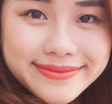

In [ ]:
image=create_img(sample_path)
cv2_imshow(image)

In [ ]:
import os
def save_path(base_dir,folder,new_dir):
  base_dir='/content/drive/MyDrive'
  #切り取った画像を保存する
  img_path=os.path.join(base_dir,folder)
  for i,path in enumerate(os.listdir(img_path)):
    path1=os.path.join(base_dir,folder)
    print(os.path.join(path1,path))
    image=create_img(os.path.join(path1,path))
    new_path=os.path.join(new_dir,str(i)+'.jpg')
    cv2.imwrite(new_path,image)

In [ ]:
files=['autumn2','spring2','summer2','winter2']
base='/content/drive/MyDrive/image'
#画像サイズを300×300にリサイズして保存を行う｡
for i in files:
  for j in os.listdir(os.path.join(base,i)):
    path=os.path.join(base,i,j)
    a=cv2.imread(path)
    b=cv2.resize(a,dsize=(300,300))
    cv2.imwrite(path,b)

In [ ]:
#確認
a=cv2.imread('/content/drive/MyDrive/image/winter2/78.jpg')
a.shape

(300, 300, 3)

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (300,300,3), 
                                  include_top = False, 
                                  weights = None)
#HDF5ファイル形式を読み込む
pre_trained_model.load_weights(local_weights_file)

In [ ]:
for i in pre_trained_model.layers:
  i.trainable=False
pre_trained_model.summary()

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output=last_layer.output
x=layers.Flatten()(last_output)
x=layers.Dense(1024,activation='relu')(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(4,activation="softmax")(x)
model=Model(pre_trained_model.input,x)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_dir='/content/drive/MyDrive/image'
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'categorical', 
                                                    target_size = (300,300))    

Found 358 images belonging to 4 classes.


In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=12,
    epochs=300,
    verbose=1)

Text(0.5, 1.0, 'loss')

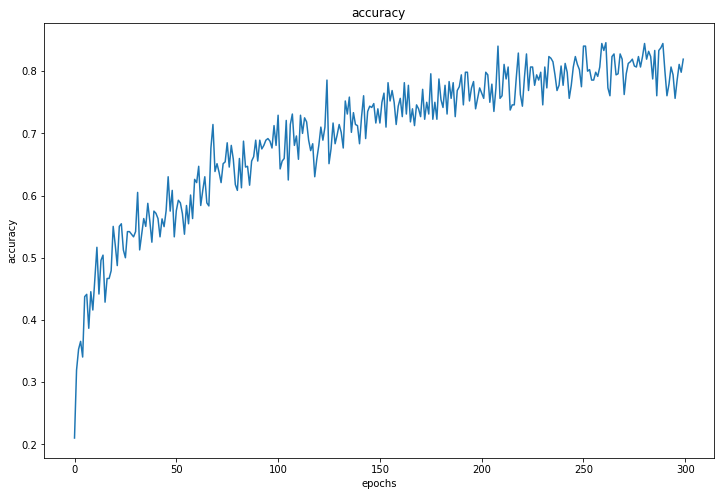

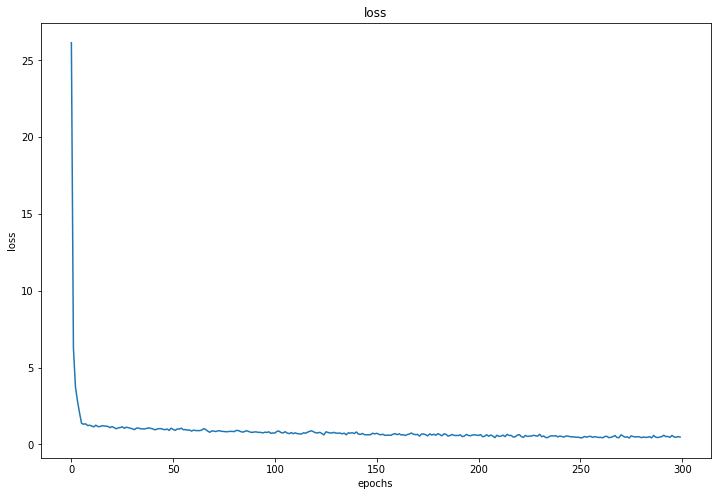

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy')
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss')

In [ ]:
model.save('/content/drive/MyDrive/personal_color_model2.h5')

In [ ]:
import dlib
import cv2
face_detector = dlib.get_frontal_face_detector()

# 顔のランドマーク検出ツールの呼び出し
predictor_path = 'shape_predictor_68_face_landmarks.dat'
face_predictor = dlib.shape_predictor(predictor_path)

In [ ]:
def predict_personal_color():
  print('パーソナルカラー診断をしたい画像のパスを教えて下さい')
  path=str(input())
  face_detector = dlib.get_frontal_face_detector()
  predictor_path = 'shape_predictor_68_face_landmarks.dat'
  face_predictor = dlib.shape_predictor(predictor_path)
  img=cv2.imread(path)
  faces=face_detector(img,1)
  if len(faces)>0:
    for face in faces:
      landmark=face_predictor(img,face)
      landmark=face_utils.shape_to_np(landmark)
      #top→landmark20 or landmark25
      if landmark[19][1]>=landmark[24][1]:
        top=landmark[19][1]
      else:
        top=landmark[24][1]
      #bottom→landmark9
      bottom=landmark[8][1]
      #left→landmark1
      left=landmark[0][0]
      #right→landmark17
      right=landmark[16][0]
      FACE=img[top:bottom,left:right]
  #facesが0の場合
  else:
    FACE=img
  predict_image=cv2.resize(FACE,dsize=(300,300))
  predict_image=predict_image.reshape(1,300,300,3)
  scores=(model.predict(pre)[0])
  score=0
  print('予想のスコアは:',scores)
  for j,k in enumerate(scores):
    if score<k:
      score=k
      ans=j
    else:
      continue
  if ans==0:
    print('あなたは秋タイプです')
  elif ans==1:
    print('あなたは春タイプです')
  elif ans==2:
    print('あなたは夏タイプです')
  elif ans==3:
    print('あなたは冬タイプです')
predict_personal_color()

パーソナルカラー診断をしたい画像のパスを教えて下さい
/content/drive/MyDrive/sample.jpg
予想のスコアは: [9.9968147e-01 7.9775076e-05 3.7978939e-06 2.3504939e-04]
あなたは秋タイプです
